# Hive Mortgage Exploratory Data Analysis

### Create Spark Session with Hive Enabled

In [1]:
from pyspark.sql.types import FloatType, IntegerType, StructField, StructType
from pyspark.sql.functions import col
from pyspark.sql import SparkSession

# warehouse_location = 'gs://<your-project>-warehouse/datasets'
service_endpoint = 'thrift://hive-cluster-m:9083'

from pyspark.sql import SparkSession
spark = SparkSession.builder \
  .appName('Hive Mortgage Exploratory Data Analysis') \
  .config("hive.metastore.uris", service_endpoint)  \
  .enableHiveSupport() \
  .getOrCreate()

# .config("spark.sql.warehouse.dir", warehouse_location) \

### Describe the default database

In [ ]:
spark.sql("DESCRIBE DATABASE EXTENDED default").show(5, False)

### Show tables  

In [2]:
spark.sql("SHOW TABLES").show()

+--------+--------------------+-----------+
|database|           tableName|isTemporary|
+--------+--------------------+-----------+
| default| mortgage_small_eval|      false|
| default|mortgage_small_train|      false|
| default|        transactions|      false|
+--------+--------------------+-----------+



### Describe the Mortage table

In [20]:
spark.sql("DESCRIBE mortgage_small_train").show(50, False)

+-------------------------------+---------+-------+
|col_name                       |data_type|comment|
+-------------------------------+---------+-------+
|orig_channel                   |float    |null   |
|first_home_buyer               |float    |null   |
|loan_purpose                   |float    |null   |
|property_type                  |float    |null   |
|occupancy_status               |float    |null   |
|property_state                 |float    |null   |
|product_type                   |float    |null   |
|relocation_mortgage_indicator  |float    |null   |
|seller_name                    |float    |null   |
|mod_flag                       |float    |null   |
|orig_interest_rate             |float    |null   |
|orig_upb                       |int      |null   |
|orig_loan_term                 |int      |null   |
|orig_ltv                       |float    |null   |
|orig_cltv                      |float    |null   |
|num_borrowers                  |float    |null   |
|dti        

### Load the full Hive table as a Spark DataFrame

In [7]:
train_df = spark.sql("SELECT * FROM mortgage_small_train")
train_df.printSchema()

root
 |-- orig_channel: float (nullable = true)
 |-- first_home_buyer: float (nullable = true)
 |-- loan_purpose: float (nullable = true)
 |-- property_type: float (nullable = true)
 |-- occupancy_status: float (nullable = true)
 |-- property_state: float (nullable = true)
 |-- product_type: float (nullable = true)
 |-- relocation_mortgage_indicator: float (nullable = true)
 |-- seller_name: float (nullable = true)
 |-- mod_flag: float (nullable = true)
 |-- orig_interest_rate: float (nullable = true)
 |-- orig_upb: integer (nullable = true)
 |-- orig_loan_term: integer (nullable = true)
 |-- orig_ltv: float (nullable = true)
 |-- orig_cltv: float (nullable = true)
 |-- num_borrowers: float (nullable = true)
 |-- dti: float (nullable = true)
 |-- borrower_credit_score: float (nullable = true)
 |-- num_units: integer (nullable = true)
 |-- zip: integer (nullable = true)
 |-- mortgage_insurance_percent: float (nullable = true)
 |-- current_loan_delinquency_status: integer (nullable = tru

### Analyse data using Spark SQL or DataFrame API

In [14]:
spark.sql("""
SELECT delinquency_12, count(*) as count
FROM mortgage_small_train
GROUP BY delinquency_12
""").show()

+--------------+-----+
|delinquency_12|count|
+--------------+-----+
|             1|   60|
|             0| 7940|
+--------------+-----+



In [11]:
train_df.groupBy("delinquency_12").count().show()

+--------------+-----+
|delinquency_12|count|
+--------------+-----+
|             1|   60|
|             0| 7940|
+--------------+-----+



In [8]:
train_df.groupBy('current_loan_delinquency_status').count().show()

+-------------------------------+-----+
|current_loan_delinquency_status|count|
+-------------------------------+-----+
|                              1|  181|
|                              6|    3|
|                              3|    7|
|                              5|    3|
|                              4|    3|
|                              8|    1|
|                              7|    1|
|                             -2|  187|
|                              2|   21|
|                              0| 7593|
+-------------------------------+-----+



### Convert to Pandas DataFrame and plot data

In [15]:
spark.conf.set("spark.sql.execution.arrow.enabled", "true")

In [16]:
train_pandas_df = train_df.toPandas()
train_pandas_df.head()

,orig_channel,first_home_buyer,loan_purpose,property_type,occupancy_status,property_state,product_type,relocation_mortgage_indicator,seller_name,mod_flag,...,num_units,zip,mortgage_insurance_percent,current_loan_delinquency_status,current_actual_upb,interest_rate,loan_age,msa,non_interest_bearing_upb,delinquency_12
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,852,0.0,0,200201.625000,7.125,34.0,38060.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,852,0.0,0,200601.796875,7.125,32.0,38060.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,852,0.0,0,201388.046875,7.125,28.0,38060.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,852,0.0,0,201581.703125,7.125,27.0,38060.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,852,0.0,0,201774.234375,7.125,26.0,38060.0,0.0,0


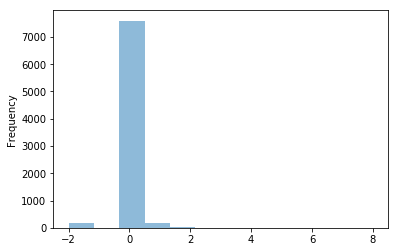

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

ax = train_pandas_df["current_loan_delinquency_status"].plot.hist(bins=12, alpha=0.5)

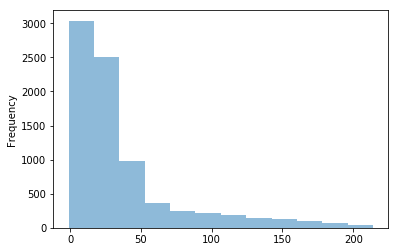

In [21]:
ax = train_pandas_df["loan_age"].plot.hist(bins=12, alpha=0.5)